# Background

In this notebook we generate surrogate data to test the information measures on. The data is generated in the spectral domain and the amount of information is changed by changing the kernel that determines the correlations as a function of intersource distance.


# Code

In [22]:
%pylab inline
import os, sys, pickle, logging
from importlib import reload
from units import UNITS
plt.style.use("default")


Populating the interactive namespace from numpy and matplotlib


# Loading the class

In [23]:
import surrogate as surr; reload(surr)

INFO:boulder:Surrogate simulation data available for: ['no_info', 'one_info', 'two_info', 'spike_and_slab', 'all_equal']


<module 'surrogate' from '/nemo/lab/schaefera/working/tootoos/git/fisher-plumes/surrogate.py'>

In [54]:
reload(surr)
SSD = surr.SurrogateSimulationData("no_info")
SSD.use_coords([(0,0)]*UNITS.m)

INFO:surrogate:Surrogate simulation data available for: ['no_info', 'one_info', 'two_info', 'spike_and_slab', 'all_equal']


INFO:surrogate:
no_info <class 'surrogate.SurrogateSimulationData'>
x_lim: 1 meter to 1 meter
y_lim: 0 meter to 0 meter
x-y Dimensions: [1 1] m
x-range: 1.000 meter, ... 1.000 meter (1 points)
y-range: 0.000 meter, ... 0.000 meter (1 points)
t-range: 0.000 second, 0.020 second ... 60.000 second (3001 points)
fs: 50 hertz
Sources:
  0: =     S0 @ (x = +0 meter, y = +0 meter)
  1: =     S1 @ (x = +0 meter, y = +1 meter)
  2: =     S2 @ (x = +0 meter, y = +2 meter)
  3: =     S3 @ (x = +0 meter, y = +3 meter)
  4: =     S4 @ (x = +0 meter, y = +4 meter)
  5: =     S5 @ (x = +0 meter, y = +5 meter)
  6: =     S6 @ (x = +0 meter, y = +6 meter)
  7: =     S7 @ (x = +0 meter, y = +7 meter)


INFO:surrogate:Mapped coordinate (0.000 meter, 0.000 meter) to (1.000 meter, 0.000 meter), index (0, 0), name '@origin'.


INFO:surrogate:Field S0 has shape (3001, 1).


INFO:surrogate:Field S1 has shape (3001, 1).


INFO:surrogate:Field S2 has shape (3001, 1).


INFO:surrogate:Field S3 has shape (3001, 1).


INFO:surrogate:Field S4 has shape (3001, 1).


INFO:surrogate:Field S5 has shape (3001, 1).


INFO:surrogate:Field S6 has shape (3001, 1).


INFO:surrogate:Field S7 has shape (3001, 1).


(0.0, 10.0)

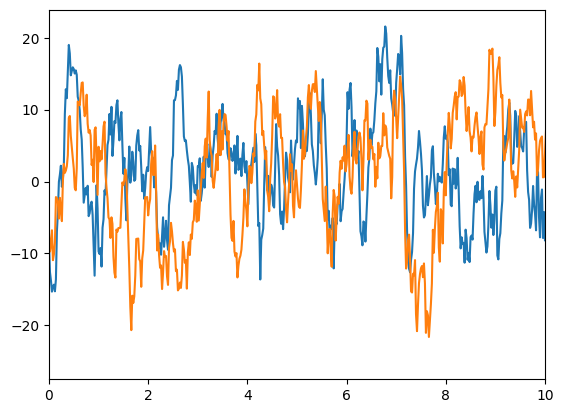

In [55]:
plot(SSD.t, SSD.data["S0"][:,0])
plot(SSD.t, SSD.data["S1"][:,0])
xlim(0,10)


# Generating data

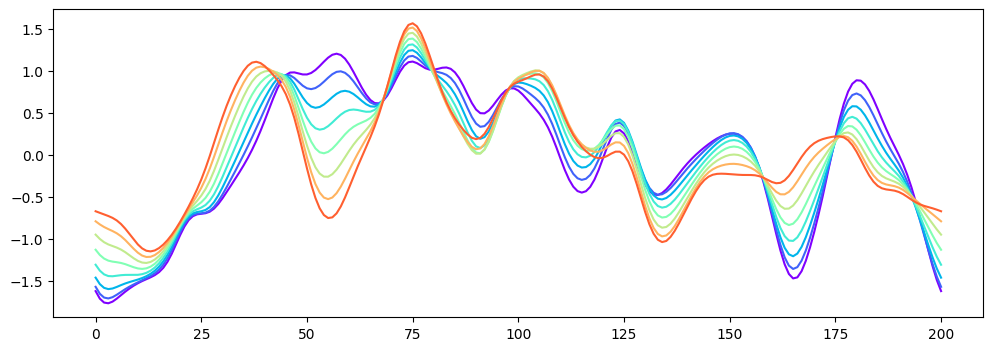

In [66]:
n_src      = 8
n_freq     = 100

ker_space  = lambda i,j,n: exp(-0.1*abs(i-j)**2)
ker_freq   = lambda i,j,n: exp(-n/2)
kernel_fun = lambda i,j,n: ker_space(i,j,n) * ker_freq(i,j,n)
K          = zeros((n_src*n_freq, n_src*n_freq))
for n in range(n_freq):
    for i in range(n_src):
        for j in range(n_src):
            K[n_src * n + i, n_src * n + j] = kernel_fun(i,j,n)

L = cholesky(K)
Xr, Xc = randn(2, n_src*n_freq) @ L.T

t = arange(0,2*n_freq+1)
f = 2*pi*arange(1,n_freq+1)/(2*n_freq)
C = cos(outer(t, f))
S = sin(outer(t, f))
c = (Xr + Xc)/2
s = (Xr - Xc)/2
x = []
for i in range(n_src):
    x.append(C @ c[i::n_src] + S @ s[i::n_src])
X = np.array(x)
figure(figsize=(12,4))
gca().set_prop_cycle(color=[cm.rainbow(i/n_src) for i in range(n_src)])
plot(t, X.T);

<ipython-input-49-de2f4e339e0d>:1: RuntimeWarning: divide by zero encountered in log10
  matshow(log10(K))


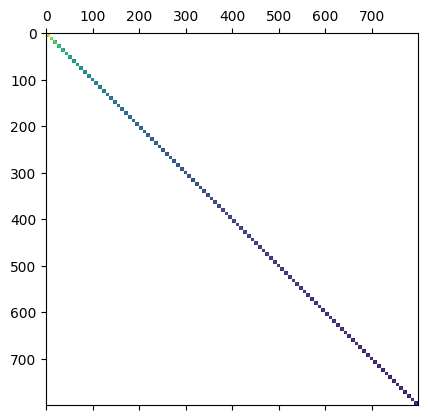

In [49]:
matshow(log10(K))

In [26]:
c.shape

(80,)

In [25]:
C.shape

(21, 10)

In [22]:
pi

3.141592653589793

In [20]:
outer(t,f)

NameError: name 't' is not defined

In [18]:
np.add.outer([1,2],[3,4])

array([[4, 5],
       [5, 6]])

In [15]:
c.shape

(80,)

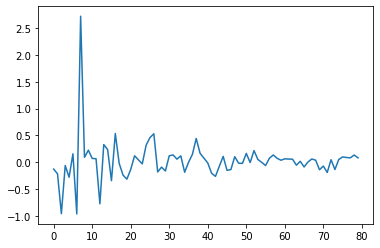

In [12]:
plot(Xr)

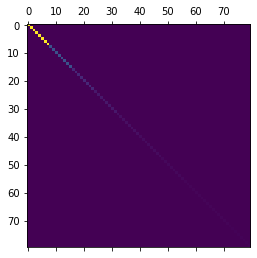

In [7]:
matshow(K)

In [4]:
K

array([[1.  , 1.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [1.  , 1.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [1.  , 1.  , 1.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.01, 0.01, 0.01],
       [0.  , 0.  , 0.  , ..., 0.01, 0.01, 0.01],
       [0.  , 0.  , 0.  , ..., 0.01, 0.01, 0.01]])